In [162]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
import pandas as pd

(a) Data loading
First, check data characteristics. What is the data format, is metadata available? Is there a possibility to
load the data directly or is a transformation necessary?

In [163]:
with open('LoanStats3d.csv', 'r') as f:
    for i in range(5):
        print f.readline()
f.close()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)

"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","op

In [164]:
import os
os.popen('tail -n 6 LoanStats3d.csv').read().splitlines()

['"36271333","38982739","13000","13000","13000"," 60 months"," 15.99%","316.07","D","D2","Radiologist Technologist","5 years","RENT","35000","Verified","Jan-2015","Current","n","https://www.lendingclub.com/browse/loanDetail.action?loan_id=36271333","","debt_consolidation","Debt consolidation","378xx","TN","30.9","0","Sep-2003","0","","84","9","1","11031","61.3%","22","w","10818.42","10818.42","4401.88","4401.88","2181.58","2220.30","0.0","0.0","0.0","Mar-2016","316.07","Apr-2016","Mar-2016","0","","1","INDIVIDUAL","","","","0","0","34178","","","","","","","","","","","","18000","","","","7","3798","2554","75.9","0","0","134","108","6","6","0","17","","10","","0","4","6","4","4","12","7","10","6","9","0","0","0","3","100","50","1","0","51239","34178","10600","33239"',
 '"36271262","38982659","20000","20000","20000"," 36 months"," 11.99%","664.2","B","B5","Manager Hotel Operations Oasis ","10+ years","RENT","100000","Verified","Jan-2015","Current","n","https://www.lendingclub.com/browse

In [ ]:
dataset = pd.read_csv('LoanStats3d.csv', header=1, skipfooter=4, index_col='id', engine='python')

(b) First exploration
Now, after data is loaded, what does it look like? How many instances are there, how many features? To
get a first feeling about the dataset, print a few instances and take a closer look at them.

In [165]:
len(dataset)

421095

In [166]:
dataset.columns.values

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'ac

In [167]:
dataset.head(3)

member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                         
68426699   73316523      20000        20000            20000   36 months   
67275481   72077199      20000        20000            20000   36 months   
68446771   73336594       7200         7200             7200   36 months   

          int_rate  installment grade sub_grade  \
id                                                
68426699      6.49       612.89     A        A2   
67275481      8.49       631.26     B        B1   
68446771     15.77       252.32     D        D1   

                                        emp_title            ...              \
id                                                           ...               
68426699              TEAM LEAD, QUALITY ENGINEER            ...               
67275481                              road driver            ...               
68446771  Bank Officer Senior Customer Care Spec.            ...               

         num_tl_90g_dpd_24m num_tl_op_past_12m  pct_tl_nvr_dlq  \
id                                                               
68426699                  0                  2            95.7   
67275481                  1                  0            93.3   
68446771                  0                  3            97.7   

         percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim  \
id                                                                         
68426699                0                    0         0          247433   
67275481                0                    0         0          193390   
68446771               50                    0         1          255047   

         total_bal_ex_mort total_bc_limit total_il_high_credit_limit  
id                                                                    
68426699             41663          12700                      46367  
67275481             27937          14500                      36144  
68446771            275831           6700                     246447  

[3 rows x 110 columns]

In [168]:
dataset.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count    421095.000000  421095.000000  421095.000000    421095.000000   
mean   57595755.825602   15240.285862   15240.285862     15234.156307   
std    10133578.725292    8571.325901    8571.325901      8567.935724   
min       70825.000000    1000.000000    1000.000000       900.000000   
25%    49226166.000000    8500.000000    8500.000000      8500.000000   
50%    58953580.000000   14000.000000   14000.000000     14000.000000   
75%    66045844.000000   20000.000000   20000.000000     20000.000000   
max    73544841.000000   35000.000000   35000.000000     35000.000000   

            int_rate    installment      annual_inc            dti  \
count  421095.000000  421095.000000   421095.000000  421095.000000   
mean       12.601437     441.870837    76965.608663      19.195989   
std         4.318000     244.856460    73949.961469      23.504038   
min         5.320000      30.120000        0.000000       0.000000   
25%         9.170000     263.930000    46000.000000      12.590000   
50%        12.290000     385.420000    65000.000000      18.600000   
75%        15.590000     578.790000    91690.500000      25.340000   
max        28.990000    1445.460000  9500000.000000    9999.000000   

         delinq_2yrs  inq_last_6mths             ...              \
count  421095.000000   421095.000000             ...               
mean        0.347397        0.572690             ...               
std         0.927695        0.867776             ...               
min         0.000000        0.000000             ...               
25%         0.000000        0.000000             ...               
50%         0.000000        0.000000             ...               
75%         0.000000        1.000000             ...               
max        39.000000        6.000000             ...               

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count       421095.000000       421095.000000   421095.000000   
mean             0.094318            2.170947       93.924313   
std              0.522758            1.853858        8.875399   
min              0.000000            0.000000        0.000000   
25%              0.000000            1.000000       90.900000   
50%              0.000000            2.000000       97.400000   
75%              0.000000            3.000000      100.000000   
max             39.000000           30.000000      100.000000   

       percent_bc_gt_75  pub_rec_bankruptcies      tax_liens  tot_hi_cred_lim  \
count     416856.000000         421095.000000  421095.000000    421095.000000   
mean          47.527110              0.133188       0.064556    173407.010240   
std           36.054458              0.385975       0.444231    175672.215831   
min            0.000000              0.000000       0.000000      2500.000000   
25%           15.400000              0.000000       0.000000     50909.000000   
50%           50.000000              0.000000       0.000000    111405.000000   
75%           75.000000              0.000000       0.000000    249629.000000   
max          100.000000             11.000000      85.000000   9999999.000000   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count      421095.000000   421095.000000               421095.000000  
mean        52221.989480    21958.208958                43478.645683  
std         49074.939518    21840.371112                43942.713801  
min             0.000000        0.000000                    0.000000  
25%         22598.500000     7800.000000                15481.500000  
50%         39596.000000    15200.000000                32970.000000  
75%         65651.000000    28600.000000                58299.000000  
max       2921551.000000   834300.000000              2101913.000000  

[8 rows x 86 columns]

(c) Loan status
The feature loan status describes current loan status for each loan. Now it is the time to gain first insights.
What do you think, is Lending club successful? Would you recommend to invest in it?

In [170]:
dataset['loan_status'].value_counts()

Current               371168
Fully Paid             34061
Charged Off             6011
Late (31-120 days)      5648
In Grace Period         2828
Late (16-30 days)       1251
Default                  128
Name: loan_status, dtype: int64

(d) Bad & Good loans
For further analysis we want to compare different characteristics of successful and unsuccessful loans.
Select two samples of the same size: one with already repaid (loan status ’Fully Paid’) and one with
charged off loans (loan status ’Charged Off ’)

In [171]:
good_loans = dataset[dataset['loan_status'] == 'Fully Paid']

In [172]:
len(good_loans)

34061

In [173]:
bad_loans = dataset[dataset['loan_status'] == 'Charged Off']

In [174]:
len(bad_loans)

6011

In [175]:
good_loans = good_loans.sample(n=6011)

In [176]:
len(good_loans)

6011

In [177]:
matplotlib.rcParams.update({'font.size': 25}) 
f_size = (25,10)
def barplot_comparison(feature, axs):
    indices = good_loans[feature].value_counts().index.union( bad_loans[feature].value_counts().index)
    def barplot(data, color, label, pos):
        return data.plot(\
                         kind = 'bar',\
                         figsize = f_size,\
                         color = color,\
                         position=pos,\
                         label = label,\
                         legend= True,\
                         ax=axs,\
                         width=0.3)
        
    barplot(\
              data = bad_loans[feature].value_counts()[indices],\
              color = 'blue',\
              label = 'bad loans',\
              pos = 0,\
            )
    barplot(\
              data = good_loans[feature].value_counts()[indices],\
              color = 'red',\
              label = 'good loans',\
              pos = 1,\
            )
    
    



(e) Per state distribution
The dataset provides the home state information for each borrower. In the lecture you’ve learned about
different types of data. What is the data type of this feature?
Now, if we want to compare creditworthiness for the residents of different states, what would be a suitable
visualization? Visualize the per state distributions for good and bad loans. What do you think, is this
feature valuable?

In [178]:
dataset['addr_state'].head(10)

id
68426699    TN
67275481    SC
68446771    NY
68615044    CA
68466995    OH
68516838    VA
68526907    NM
68617034    OH
68356614    GA
67849662    KS
Name: addr_state, dtype: object

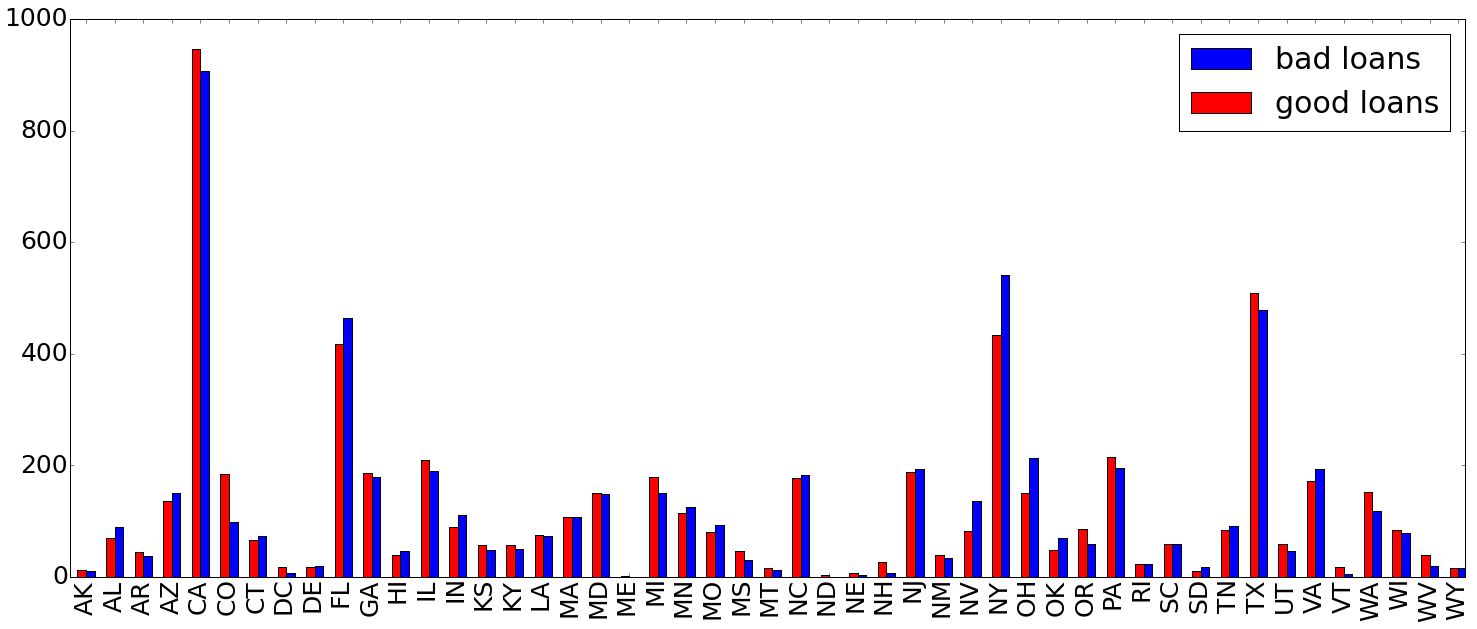

In [179]:
barplot_comparison('addr_state', plt.axes())

(f) Other interesting features
What about home ownership, emp length, purpose features? How do the values look like? What do you
think, the borrower with which characteristics would repay credit with highest probability? Visualize
features separately and prove your intuition.

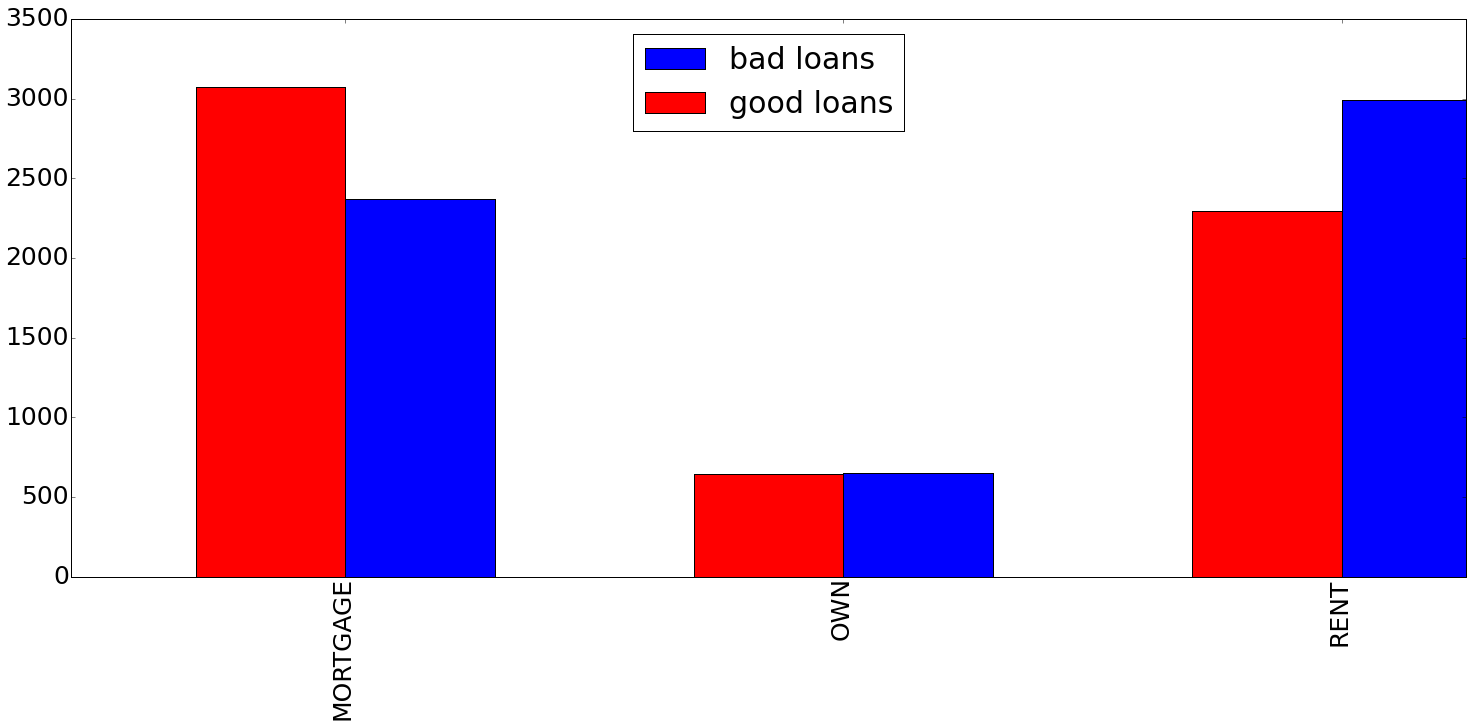

In [180]:
barplot_comparison('home_ownership', plt.axes())

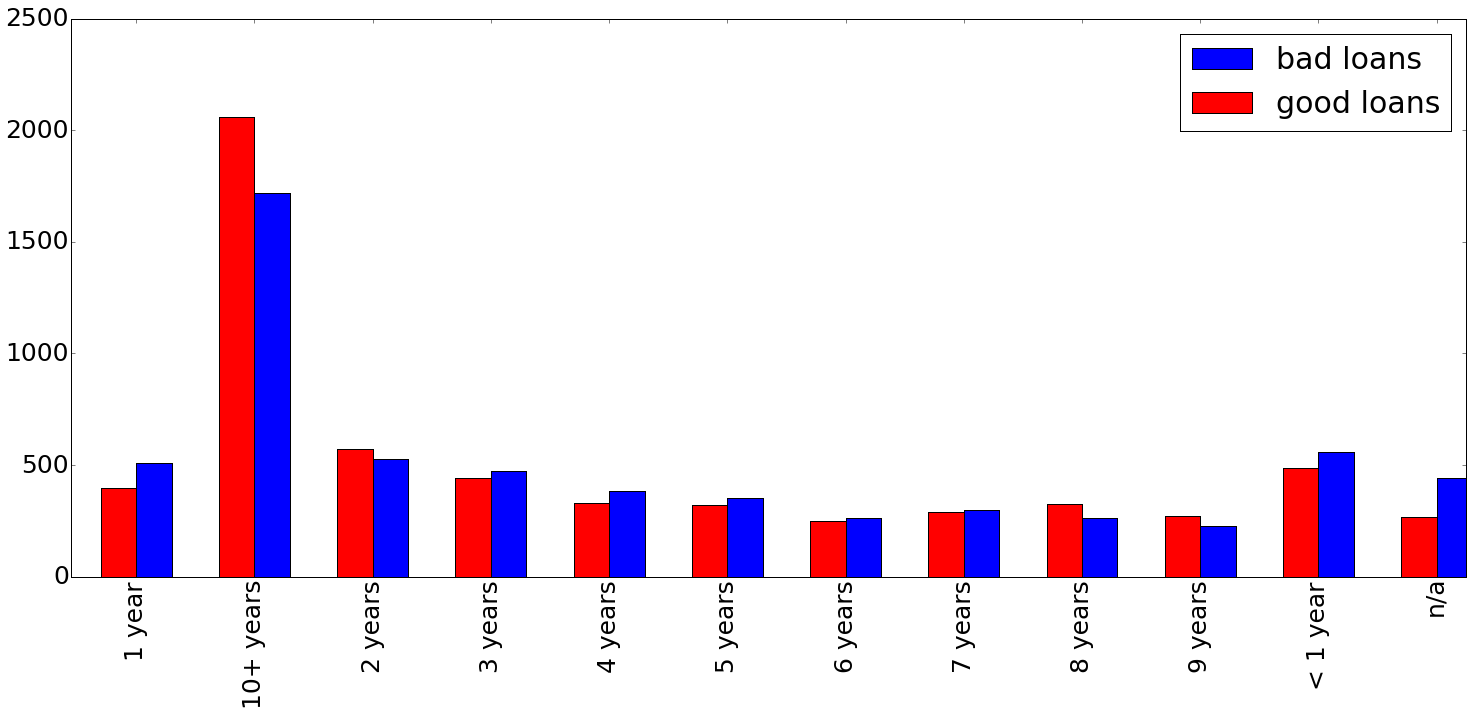

In [181]:
barplot_comparison('emp_length', plt.axes())

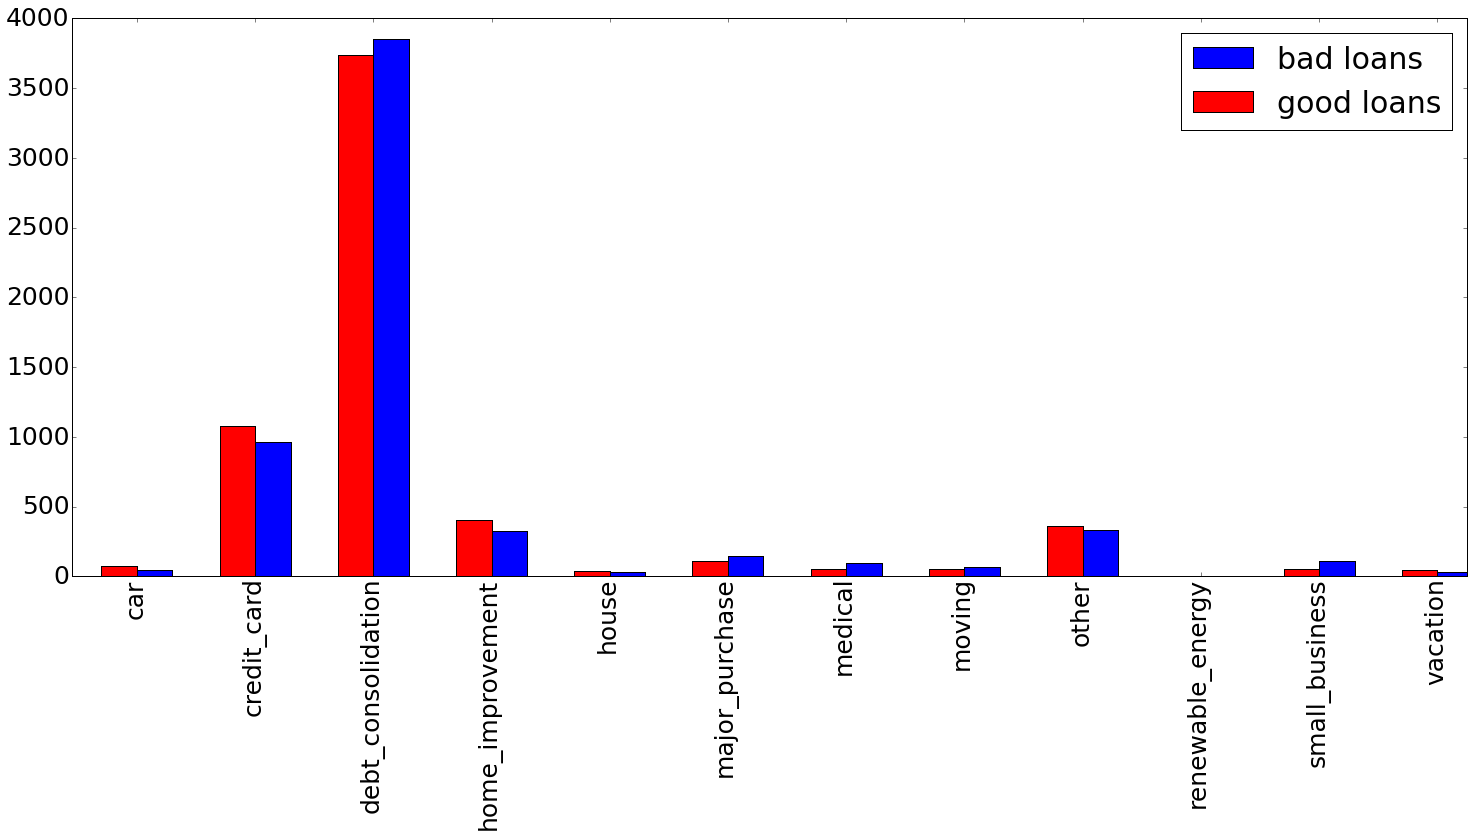

In [182]:
barplot_comparison('purpose' , plt.axes())

(g) Loan Grade
The grade feature describes the grade assigned to the loan by the Lending club. This grade describes
Lending club’s estimation of repayment probability and therefore determines the loan interest rate. Prove
this estimation. How good is it?

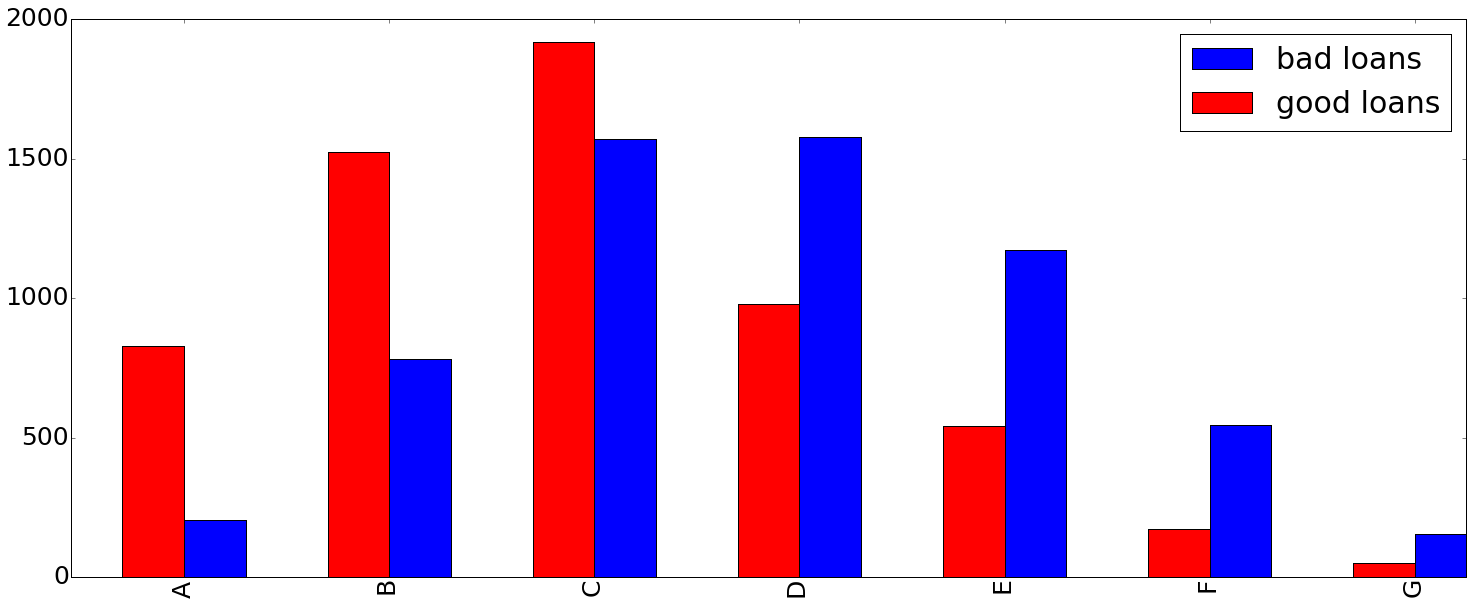

In [184]:
barplot_comparison('grade', plt.axes())

In [185]:

def boxplot_comparison(feature, axs, figsize = None):
    f = None
    if figsize:
        f = figsize
    else:
        f = f_size
    def boxplot(data, pos, ax):
        data.plot(\
                  kind='box',\
                  figsize=f,\
                  grid = True,\
                  showmeans = True,\
                  showcaps = True,\
                  whis='range',\
                  positions = pos,
                  ax=ax
                 )

    boxplot(\
            data = bad_loans[feature],\
            ax=axs,\
            pos = [0.5],
            )
    boxplot(\
            data = good_loans[feature],\
            ax=axs,\
            pos = [1],
            )

    axs.set_xticklabels(['','bad loans','good loans',''])
    axs.set_xticks([0, 0.5, 1 , 1.5])

(h) Credit costs to income
The dti feature describes borrowers’ costs of previously taken credits relative to income. What data type
is it? What are the possible ways to describe the distribution?
Let’s say we want to order the values and visualize minimum and maximum values. In addition, consider
smallest quarter, half and three quarters of values. Select a suitable visualization and compare distributions
of both samples.

In [ ]:
dataset['dti'].head(3)

In [ ]:
dataset['dti'].describe()

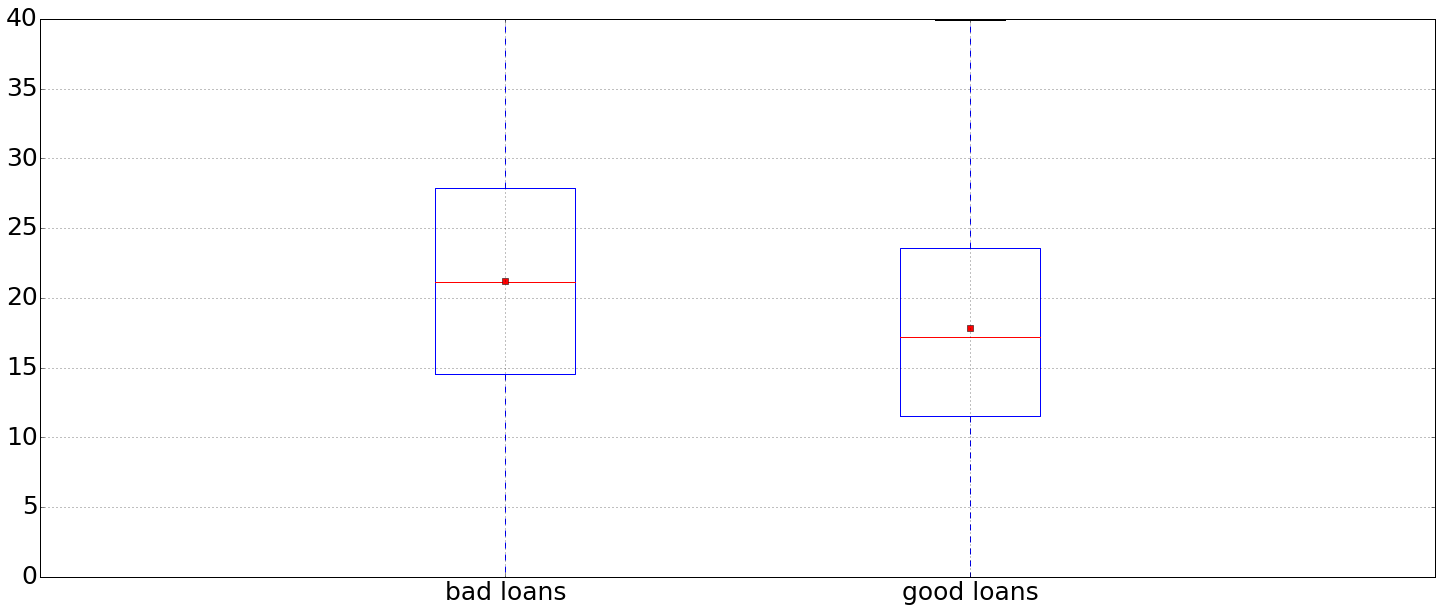

In [186]:
boxplot_comparison('dti', plt.axes())

(i) Interest rate
Does the credit interest rate correlate with the probability of repayment? Compare distributions of interest
rates of both samples. For each sample compute also a mean of interest rate. Does it differ from the
median. If yes, why? What do you think, which measure is more meaningful?

In [187]:
dataset['int_rate'].head(3)

id
68426699     6.49
67275481     8.49
68446771    15.77
Name: int_rate, dtype: float64

In [ ]:
def convert_percent_to_float_if_necess(data, feature):
    if data[feature].dtype == 'float64':
        return
    data[feature] = data[feature].dropna().apply(lambda perc: float(str(perc)[:-1]))


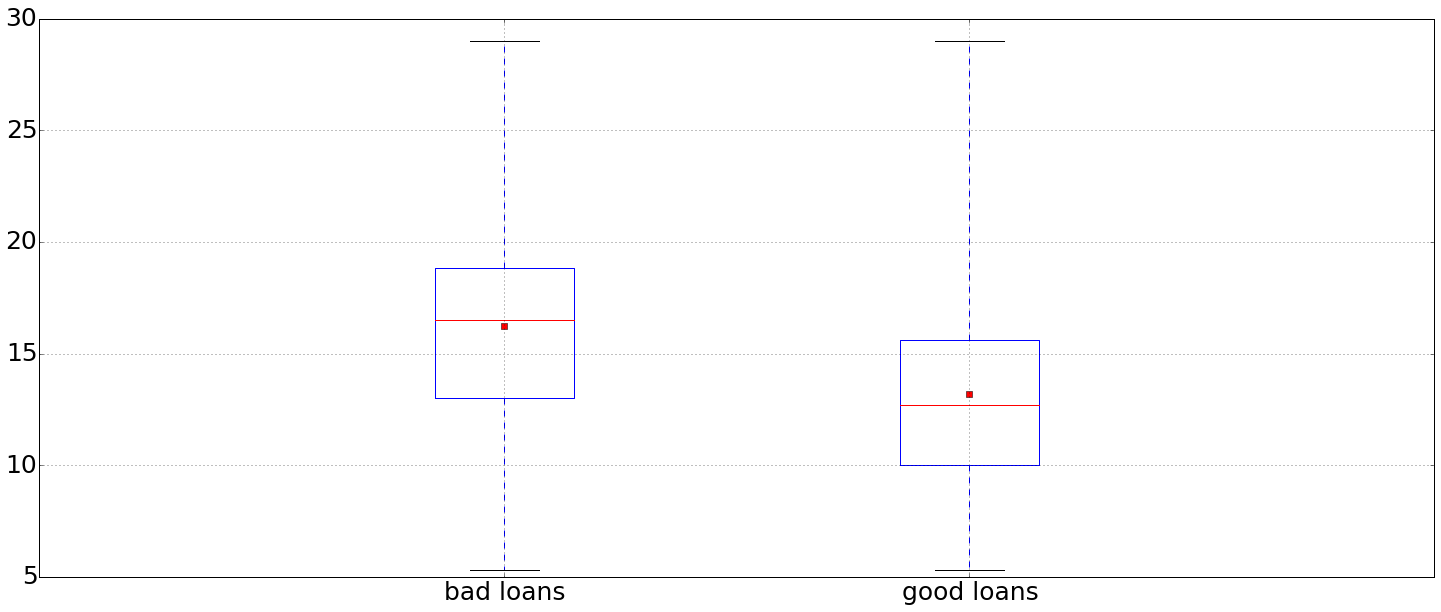

In [188]:
convert_percent_to_float_if_necess(bad_loans, 'int_rate')
convert_percent_to_float_if_necess(good_loans, 'int_rate')
convert_percent_to_float_if_necess(dataset, 'int_rate')
boxplot_comparison('int_rate', plt.axes())

(j) Income
What about income, does a person’s income say anything about creditworthiness? Compare distributions
of annual inc of both samples.

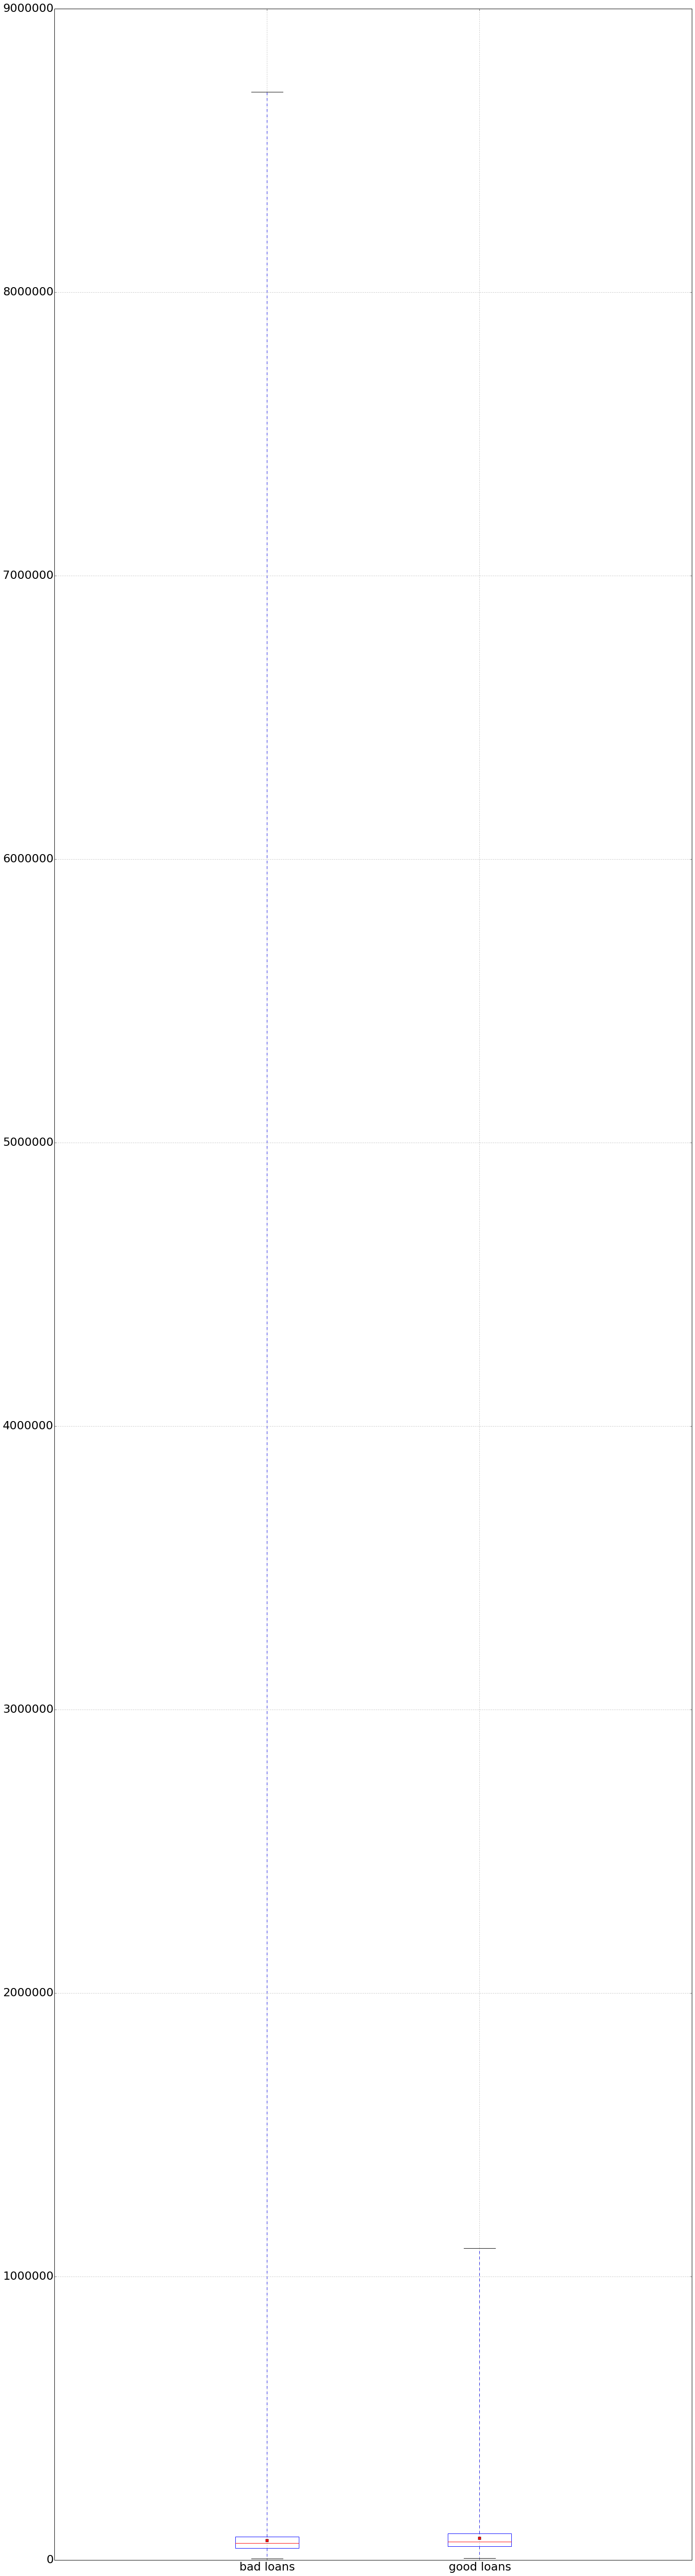

In [189]:
boxplot_comparison('annual_inc', plt.axes(), (25,100))

(k) Income discretization
Comparison of continuous values can be tedious. Sometimes it is much easier to discretize and then to
compare. Think of meaningful income ranges, name it and assign income a label to each loan. Compare
the distributions of values for both samples.

In [190]:
def define_income_category(income):
    if income < 50000:
        return 'small'
    elif income < 150000:
        return 'middle'
    elif income < 250000:
        return 'high'
    else:
        return 'very high'
def assign_inc_cat(data):
    data['inc_cat'] = data['annual_inc'].apply(lambda inc:define_income_category(inc))
    

In [192]:
assign_inc_cat(good_loans)
assign_inc_cat(bad_loans)


/Users/efaerman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


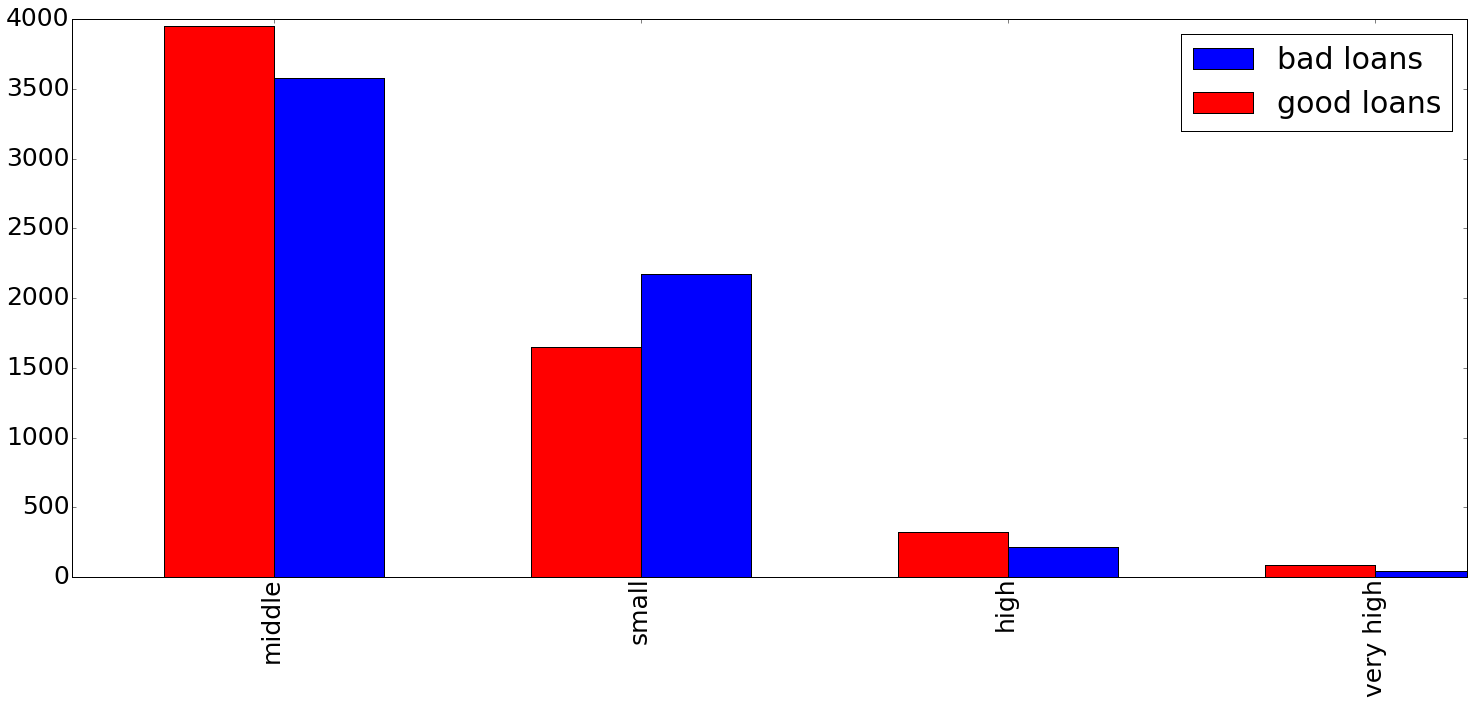

In [193]:
barplot_comparison('inc_cat', plt.axes())

(l) Limits comparison
Let’s continue with the whole dataset. The total bc limit feature shows the limit of all borrowers’ bankcards.
total rev hi lim states the limit issued by the lending club. Visualize the coherence between two
features. Is there a correlation?

(0, 400000)

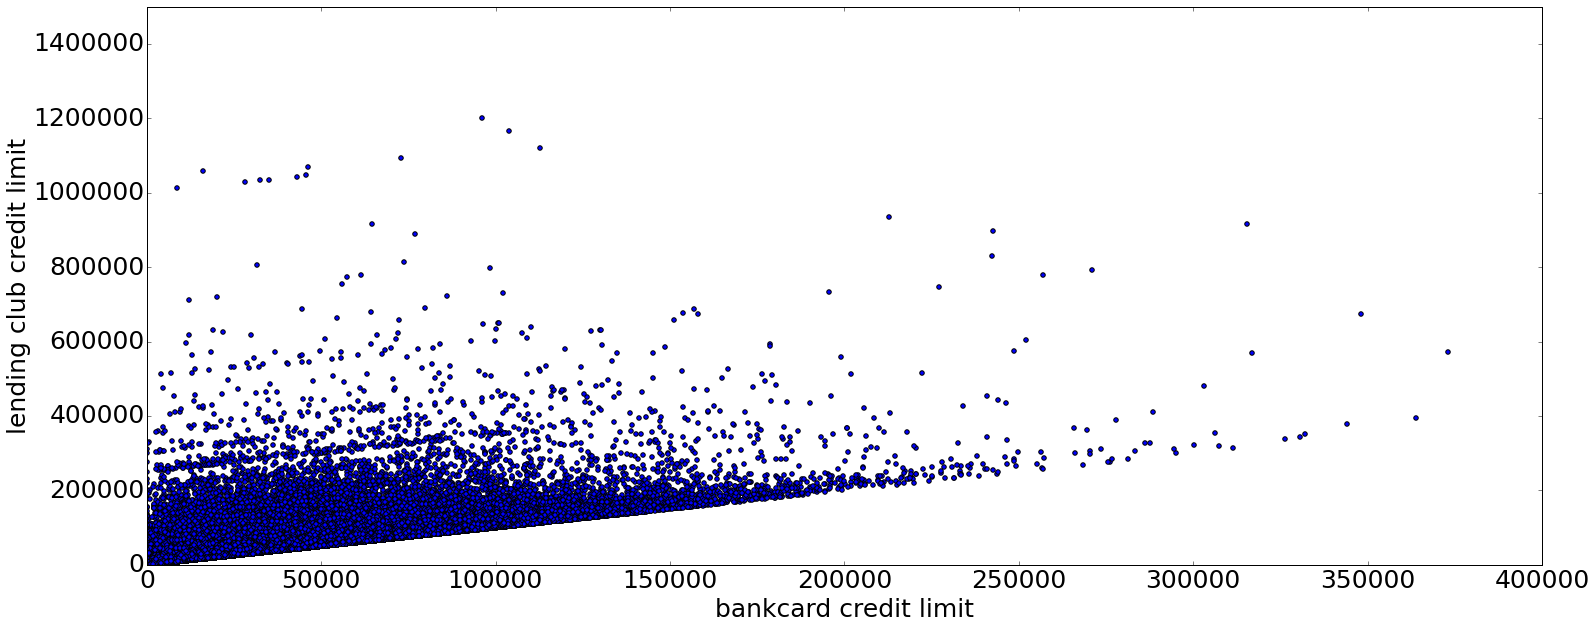

In [194]:
ax = dataset.plot(\
                  kind = 'scatter',\
                  x = 'total_bc_limit',\
                  y = 'total_rev_hi_lim',\
                  figsize=f_size,\
                  )
ax.set_xlabel('bankcard credit limit')
ax.set_ylabel('lending club credit limit')
ax.set_ylim((0, 1.5*1e6))
ax.set_xlim((0, 400000))

(m) Credit limit to annual income
Now we want to see whether there is correlation between borrowers’ income and credit limit. Make a
visualization give a statement.

(0, 1000000.0)

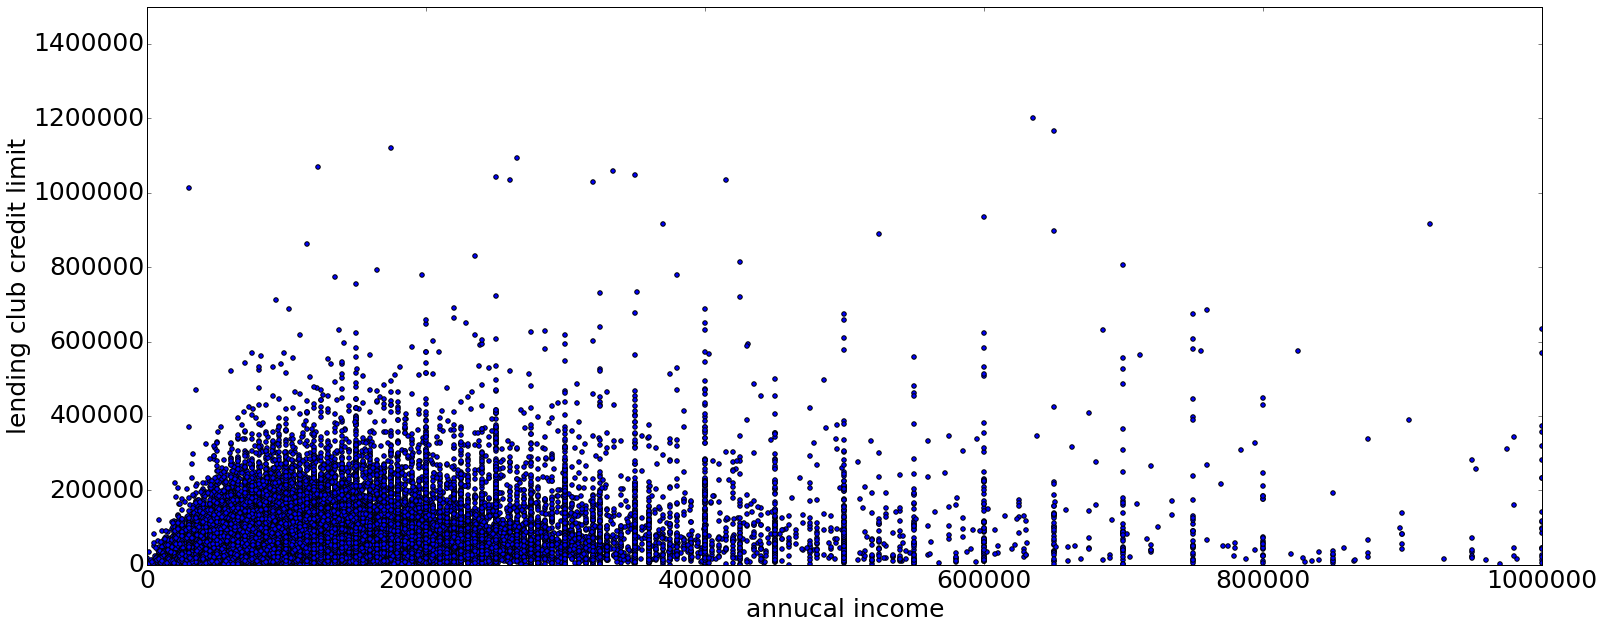

In [195]:
ax = dataset.plot(\
                  kind = 'scatter',\
                  x = 'annual_inc',\
                  y = 'total_rev_hi_lim',\
                  figsize=f_size,\
                  )
ax.set_xlabel('annucal income')
ax.set_ylabel('lending club credit limit')
ax.set_ylim((0, 1.5*1e6))
ax.set_xlim((0, 1e6))

(n) Interest rate to income
What about interest rate? Is there a correlation to annual income?

In [ ]:
#good_loans['total_il_high_credit_limit']
#bad_loans['total_acc']
#good_loans[['tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_pymnt', 'total_pymnt_inv']]
ax = dataset.plot(\
                  kind = 'scatter',\
                  x = 'annual_inc',\
                  y = 'int_rate',\
                  figsize=f_size,\
                  )
ax.set_xlabel('annucal income')
ax.set_ylabel('interest rate')
ax.set_ylim((0, 40))
ax.set_xlim((0, 1e6))

In [ ]:
Rest

In [ ]:
convert_percent_to_float_if_necess(bad_loans, 'revol_util')
convert_percent_to_float_if_necess(good_loans, 'revol_util')
boxplot_comparison('revol_util', plt.axes())
